## Udacity Project #1: Exploring Weather Trends 
by Gabe Garcia

This project goes through Data Data Analysis for Weather Trends using Python. 

### The following SQL queries were used to obtain the relevant city and global datasets

#### SQL query to extract the city level data (t1)
SELECT city_list.city,city_list.country, city_data.year, city_data.avg_temp  
FROM city_list  
LEFT JOIN city_data 
ON city_list.city = city_data.city  
AND city_list.country = city_data.country  

#### SQL query to extract the global data  (t2)

SELECT global_data.year, global_data.avg_temp  
FROM global_data  



### Python Code

In [55]:
# Import pandas
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Read CSVs
city_weather = pd.read_csv("t1.csv")
global_weather = pd.read_csv("t2.csv")

In [57]:
# Column Names: city
city_weather.columns

Index(['city', 'country', 'year', 'avg_temp'], dtype='object')

In [58]:
# Column Names: global
global_weather.columns

Index(['year', 'avg_temp'], dtype='object')

### Local Weather (New York)

In [59]:
city_weather_ny = (city_weather["city"] == "New York")
city_weather_ny

city_weather_ny = city_weather[city_weather["city"] == "New York"]
#dropna
city_weather_ny = city_weather_ny.dropna()
city_weather_ny.head(10)

,city,country,year,avg_temp
46341,New York,United States,1743,3.26
46342,New York,United States,1744,11.66
46343,New York,United States,1745,1.13
46348,New York,United States,1750,10.07
46349,New York,United States,1751,10.79
46350,New York,United States,1752,2.81
46351,New York,United States,1753,9.52
46352,New York,United States,1754,9.88
46353,New York,United States,1755,6.61
46354,New York,United States,1756,9.94


In [60]:
# create rolling column: avg_temp_rolling (10 years)
# avg_temp_temp = city_weather_ny.iloc[:,[3]].rolling(window=10).mean()
city_weather_ny = city_weather_ny.assign(avg_temp_rolling=city_weather_ny.iloc[:,[3]].rolling(window=10).mean())
#dropna after adding avg_temp_rolling column
city_weather_ny = city_weather_ny.dropna()
city_weather_ny.head(10)

,city,country,year,avg_temp,avg_temp_rolling
46354,New York,United States,1756,9.94,7.567
46355,New York,United States,1757,8.89,8.130
46356,New York,United States,1758,8.15,7.779
46357,New York,United States,1759,9.01,8.567
46358,New York,United States,1760,7.73,8.333
46359,New York,United States,1761,10.18,8.272
46360,New York,United States,1762,9.55,8.946
46361,New York,United States,1763,7.23,8.717
46362,New York,United States,1764,9.55,8.684
46363,New York,United States,1765,8.96,8.919


In [61]:
# Get Counts for avg_temp column
city_weather_ny["avg_temp"].value_counts(dropna=False).head()

9.10     5
9.17     5
9.51     5
10.00    4
9.15     4
Name: avg_temp, dtype: int64

<function matplotlib.pyplot.show>

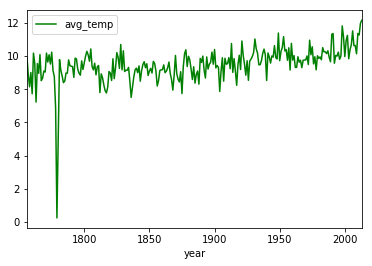

In [62]:
# avg_temp for NY
%matplotlib inline
city_weather_ny.plot(x="year", y="avg_temp", color='g')
plt.show

<function matplotlib.pyplot.show>

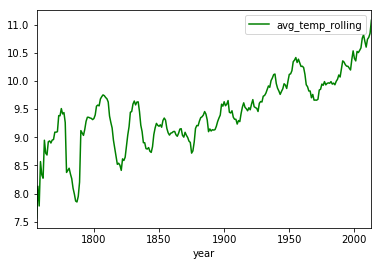

In [63]:
# avg_temp_rolling for NY
%matplotlib inline
city_weather_ny.plot(x="year", y="avg_temp_rolling", color='g')
plt.show

In [64]:
city_weather_ny.head()

,city,country,year,avg_temp,avg_temp_rolling
46354,New York,United States,1756,9.94,7.567
46355,New York,United States,1757,8.89,8.130
46356,New York,United States,1758,8.15,7.779
46357,New York,United States,1759,9.01,8.567
46358,New York,United States,1760,7.73,8.333


## Global Weather

<function matplotlib.pyplot.show>

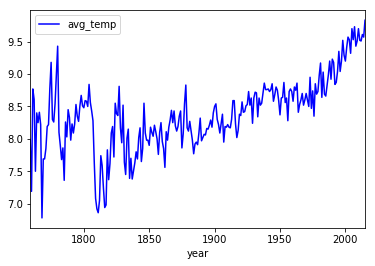

In [65]:
# create rolling column: avg_temp_rolling (10 years)
global_weather_r = global_weather.assign(avg_temp_rolling=global_weather.iloc[:,[1]].rolling(window=10).mean())
#dropna
global_weather_r = global_weather_r.dropna()

# Global avg_temp 
%matplotlib inline
global_weather_r.plot(x="year", y="avg_temp", color='b')
plt.show

<function matplotlib.pyplot.show>

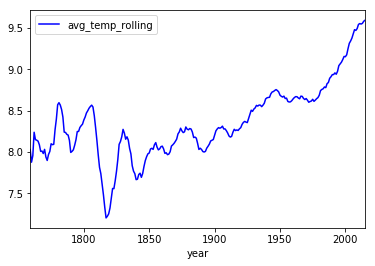

In [66]:
# Global avg_temp_rolling 
%matplotlib inline
global_weather_r.plot(x="year", y="avg_temp_rolling", color='b')
plt.show

#### The following subplot visualizations between New York weather & Global weather are great, but the scales are different. 

<function matplotlib.pyplot.show>

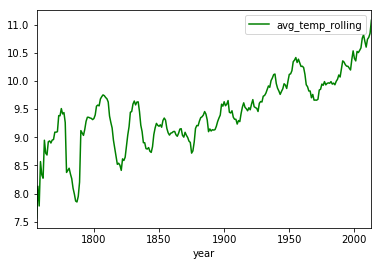

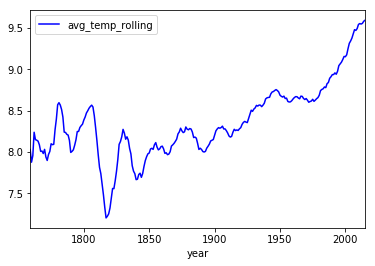

In [67]:
%matplotlib inline
city_weather_ny.plot(x="year", y="avg_temp_rolling", color='g')
global_weather_r.plot(x="year", y="avg_temp_rolling", color='b')
plt.show

In [68]:
# Add Global avg_temp_rolling column in order to create new plot
city_weather_ny['global_avg_temp_rolling'] = city_weather_ny['year'].map(global_weather_r.set_index('year')['avg_temp_rolling'])

#### Isn't this visualization better?  New York weather & Global weather are in one plot with the same scale.

<function matplotlib.pyplot.show>

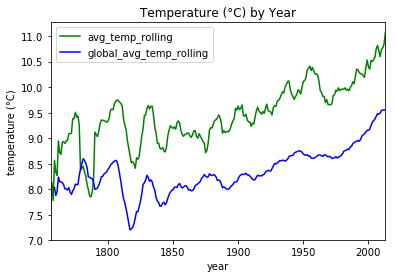

In [69]:
%matplotlib inline
city_weather_ny.plot(x="year", y=["avg_temp_rolling","global_avg_temp_rolling"], color=["g","b"])
plt.ylabel('temperature (°C)')
plt.title('Temperature (°C) by Year')
plt.show

### Observations
1) In the early 1800s, both New York & Global weather took a sharp drop.  
2) Consistent for both New York and Global weather, temperature has gradually increased throughout the years.  
3) When comparing New York & Global weather, New York is warmer as indicated by the green line chart.   
4) After 1970, New York & Global weather started to rise further